# Show first (conv maps) and final layer image encodings
##### Copyright (C) Microsoft Corporation.  
see license file for details

In [1]:
# Allow multiple displays per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# AZUREML_NATIVE_SHARE_DIRECTORY mapping to host dir is set by _nativeSharedDirectory_ in .compute file 

import os
try:
    amlWBSharedDir = os.environ['AZUREML_NATIVE_SHARE_DIRECTORY']    
except:
    amlWBSharedDir = ''
    print('not using aml services?')
    
amlWBSharedDir

'/azureml-share/'

In [3]:
# # Use the Azure Machine Learning data collector to log various metrics
# from azureml.logging import get_azureml_logger
# logger = get_azureml_logger()

In [4]:
# Use Azure Machine Learning history magic to control history collection
# History is off by default, options are "on", "off", or "show"
# %azureml history on

In [5]:
# import utlity functions

import sys, os
paths_to_append = [os.path.join(os.getcwd(), os.path.join(*(['Code',  'src'])))]
def add_path_to_sys_path(path_to_append):
    if not (any(path_to_append in paths for paths in sys.path)):
        sys.path.append(path_to_append)

[add_path_to_sys_path(crt_path) for crt_path in paths_to_append]

import trvis_utils, image_featurization

[None]

Using TensorFlow backend.


In [6]:
%matplotlib inline

In [7]:
prj_consts = trvis_utils.trvis_consts()
data_base_input_dir=os.path.join(amlWBSharedDir, os.path.join(*(prj_consts.BASE_INPUT_DIR_list)))
data_dir = os.path.join(data_base_input_dir, os.path.join(*(['cats_and_dogs', 'train'])))

In [8]:
training_image_files = os.listdir(data_dir)

len(training_image_files)
training_image_files[:2]
image_file_names = list(os.path.join(data_dir, fname) for fname in training_image_files)
image_file_names[:2]
image_file_names[-2:]

25000

['dog.6858.jpg', 'dog.1106.jpg']

['/azureml-share/data/cats_and_dogs/train/dog.6858.jpg',
 '/azureml-share/data/cats_and_dogs/train/dog.1106.jpg']

['/azureml-share/data/cats_and_dogs/train/dog.1578.jpg',
 '/azureml-share/data/cats_and_dogs/train/cat.4888.jpg']

In [9]:
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image
import numpy as np
from PIL import Image
from keras.models import Model
from keras.applications.resnet50 import ResNet50

## 1. Load and resize image

In [10]:
crt_image_file_name = image_file_names[2]
img = image.load_img(crt_image_file_name, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

## 2. Extract the first layer feature maps

In [11]:
# Load full (deep) NN model (ResNet50, minus last layer used for classification)
model = ResNet50(include_top=False)

# extract the first layer feature maps, 64 maps, total features size (1, 112, 112, 64)
shallowModel = Model(inputs=model.input, outputs=model.get_layer('conv1').output)

94658560/94653016 [==============================] - 1s 0us/step


In [12]:
# del model

In [13]:
convData = shallowModel.predict(x)

## 3. Plot the first layer feature maps as images

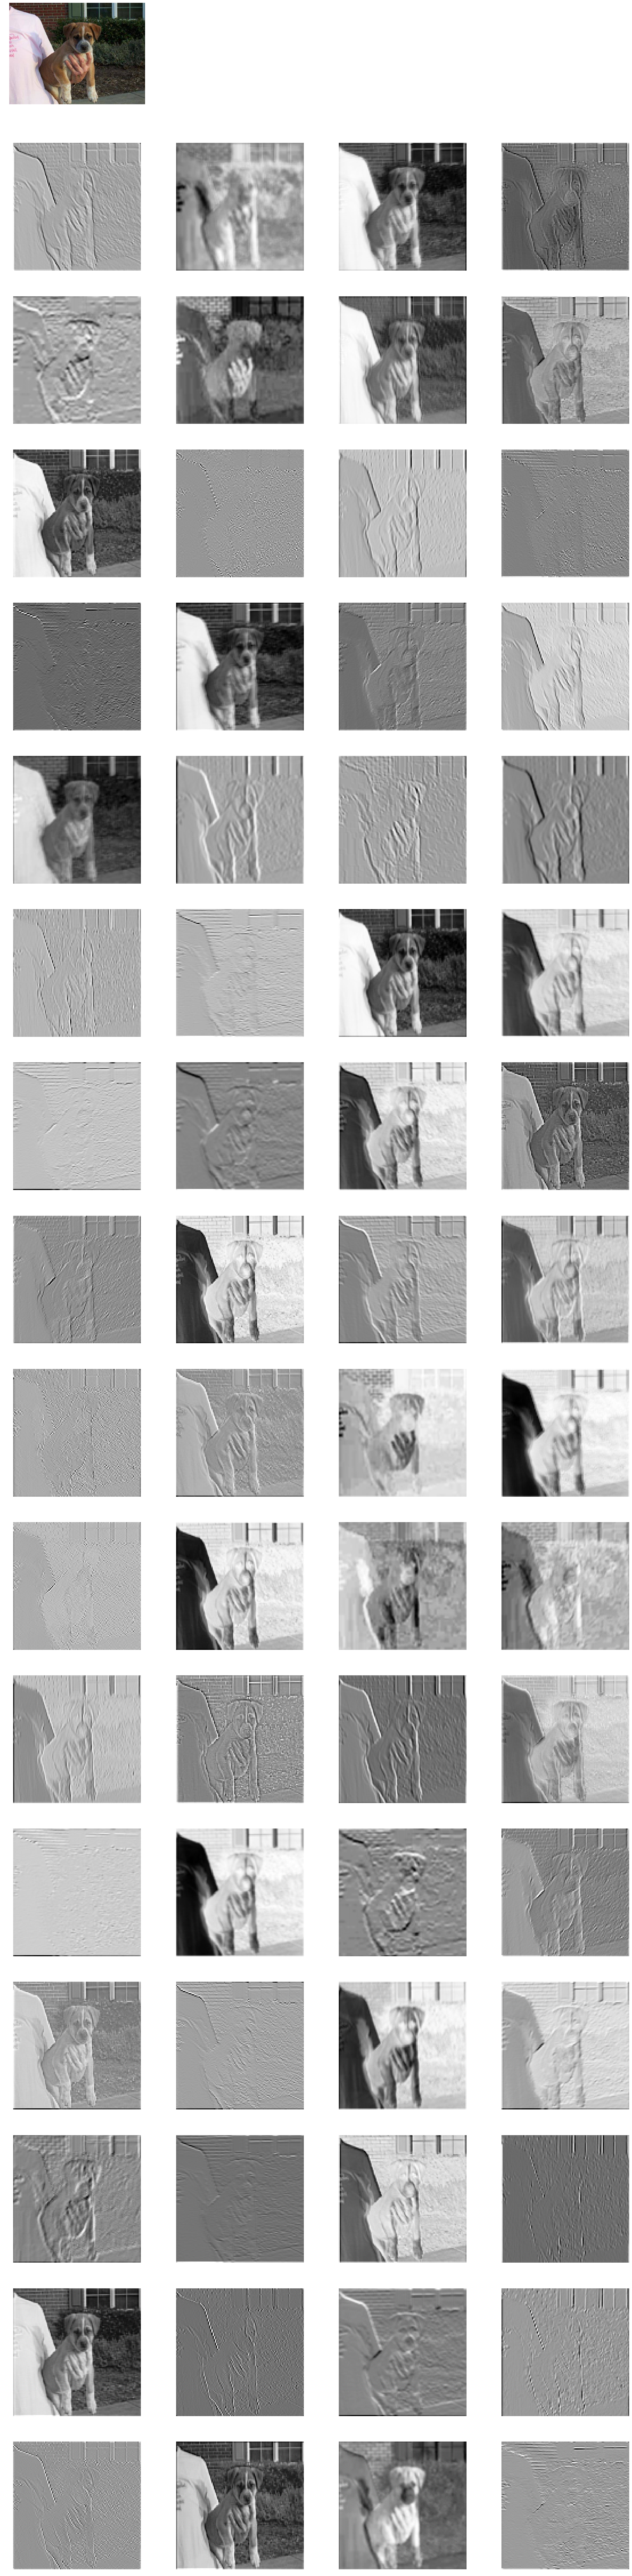

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (40,200))

#Plot first the componnet image, in color
ax1 = fig.add_subplot(20, 4, 1)
_=ax1.imshow(Image.open( crt_image_file_name))
_=plt.axis('off')
    
#plot the 64 feature maps, as 112 x 122 grayscale images
for featureMapIndex in range(convData.shape[3]):
    imgData = (convData[0,0:112,0:112,featureMapIndex]).reshape(112,112)
    imgData = (((imgData - imgData.min()) / (imgData.max() - imgData.min())) * 255.9).astype(np.uint8)
#     plt.subplot(35, 2, featureMapIndex + 1)
    ax1 = fig.add_subplot(20, 4, featureMapIndex+1+4)
    _=ax1.imshow(imgData,cmap='Greys_r')
    _=plt.axis('off')
    
plt.show()

## 4. Display the last layer encoding i.e. the deep learning features 

Text(0,0.5,'feature amplitude')

Text(0.5,0,'feature index')

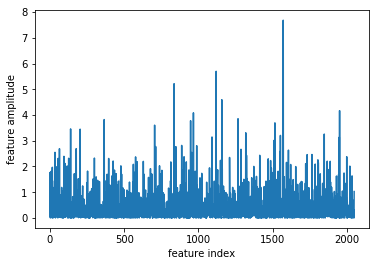

In [15]:
import matplotlib.pyplot as plt

features = model.predict(x).squeeze()

fig.add_subplot(1, 2, 2)
plt.plot(features)
plt.ylabel('feature amplitude')
plt.xlabel('feature index')
plt.show()

In [16]:
# jupyter nbconvert --to html .\Code\02_Model\010_showTL_encoding.ipynb